In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# Lendo o dataframe

In [22]:
def readDataframe(angles):
  # angles = [45,63,72]
  dfs = []
  for angle in angles:
    dfs.append( pd.read_excel('resultados_'+str(int(angle))+'g.xlsx', sheet_name=['dados_radial',"dados_wall", "dados_axis", "dados_wall_tail"]))
  return dfs

In [23]:
angles = [45,63,72]
dfs = readDataframe(angles)

# Plotando os perfis de velocidade axial e tangencial

In [109]:
def plotVel(df, distances, direction):
  # distances = [5,10,15,20,30,40,50,60]
  plt.figure(figsize=(10, 6))
  for d in distances:
    plt.scatter(df['dados_radial']['r_' + str(int(d)) + 'd'].div(R), df['dados_radial']['vel_' + direction  + '_' + str(int(d)) +'d'].div(Ub), label=str(int(d))+'D')
    
  plt.xlabel("r [m]")
  if direction == 'tang':
    plt.ylabel("v/Ub")
  elif direction == 'axial':
    plt.ylabel("u/Ub")
  plt.grid(True)
  plt.legend(loc="best")   
  plt.show;

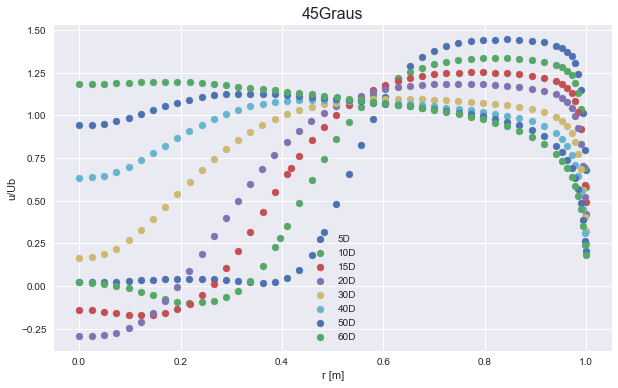

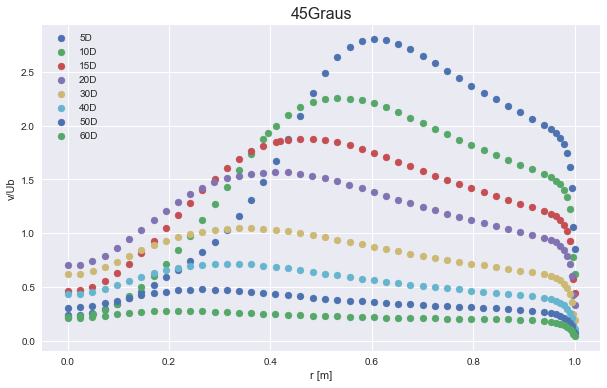

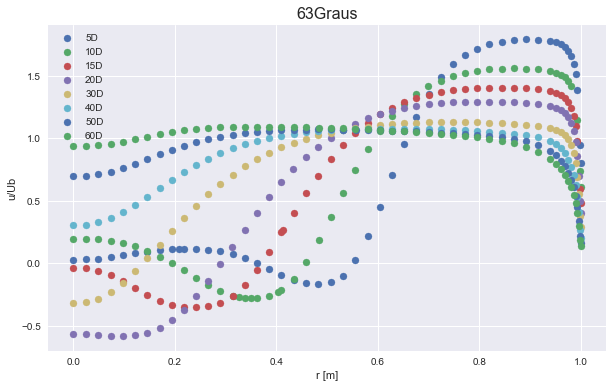

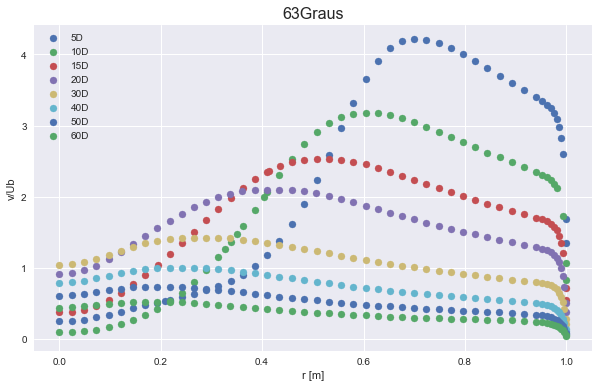

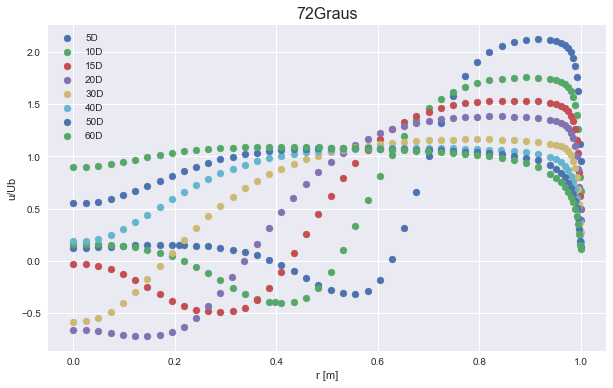

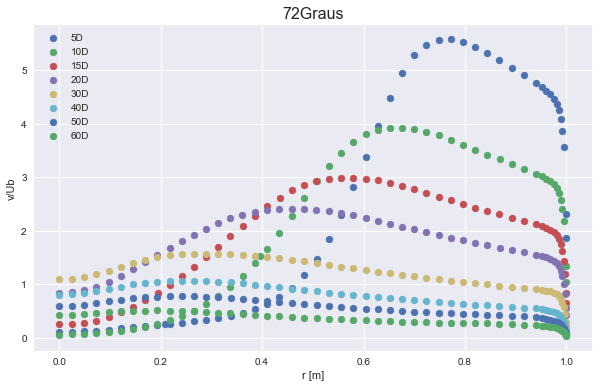

In [110]:
distances = [5,10,15,20,30,40,50,60]
R = 0.025
Ub = 1
for df,angle in zip(dfs, angles):
  plotVel(df, distances, 'axial')
  plt.title(''+ str(angle) +'Graus',  fontdict={'size': 16})
  plt.savefig('graficos/vel_axial_' + str(angle) + 'g.png')
  plotVel(df, distances, 'tang')
  plt.title(''+ str(angle) +'Graus',  fontdict={'size': 16})
  plt.savefig('graficos/vel_tang_' + str(angle) + 'g.png')

# Plotando número de giro 

In [44]:
def plotS(df, distances, angle):
  Sss = []
  for d in distances:
    Sss.append ( (2*np.pi*(np.trapz((df['dados_radial']['vel_axial_' + str(int(d)) + 'd']*df['dados_radial']['r_'+ str(int(d)) +'d']*df['dados_radial']['vel_tang_'+ str(int(d)) +'d']*df['dados_radial']['r_'+ str(int(d)) +'d']), df['dados_radial']['r_'+ str(int(d)) +'d'])))/(np.pi*(R**3)*(Ub**2)))
  S_tot = Sss #S_5d,S_10d,S_15d,S_20d,S_30d,S_40d,S_50d,S_60d
  x = distances

  #Gráfico Swirl Number
  plt.plot(x, S_tot,marker='o', label=angle)
  plt.xlabel("x/D")
  plt.ylabel("S")
  plt.grid(True)
  plt.legend(loc="best")
  plt.savefig('graficos/intensidade_giro.png')
  plt.show;

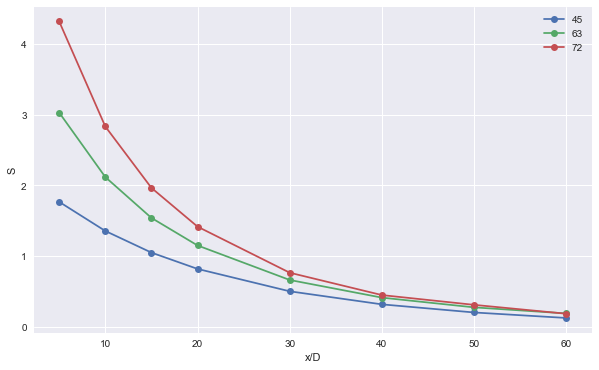

In [45]:
plt.figure(figsize=(10, 6))
for df, angle in zip(dfs, angles):
  plotS(df, distances, angle)